In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('husl')

## Get results and tidy dataset

In [135]:
df = pd.read_csv('data/results.csv', usecols=['title', 'year', 'decision', 'approach', 'category', 'model', 'preprocessing', 'skill', 'evaluation'])
df = df[df.decision.str.contains('Include')]
df.head()

,year,title,decision,approach,category,model,preprocessing,skill,evaluation
0,2021,EvalSeer: An Intelligent Gamified System for P...,Include,Supervised,Neural,LSTM,Remove comments; Normalize tokens,Correctness,Accuracy
1,2017,DeepFix: Fixing Common C Language Errors by De...,Include,Supervised,Neural,Adapted seq2seq attention model,Normalize tokens; Encode Line Numbers,Syntactic Correctness,Accuracy
4,2019,Deep Reinforcement Learning for Syntactic Erro...,Include,Semi-Supervised; Reinforcement Learning,Neural,LSTM for embedding and A3C for localisation an...,Normalize tokens,Syntactic Correctness,Accuracy; Compared to baselines
5,2018,Neuro-Symbolic Program Corrector for Introduct...,Include,Supervised,Neural,RNN,Normalize tokens,Syntactic Correctness,Accuracy; Compared to baselines
6,2017,Automatic extraction of AST patterns for debug...,Include,Supervised,Traditional,"Random Forest, Majority Classifer","Convert to Source to Graph (AST, CFG or DDG); ...",Correctness,Accuracy; Compared to models within paper


In [136]:
df.dtypes

year              int64
title            object
decision         object
approach         object
category         object
model            object
preprocessing    object
skill            object
evaluation       object
dtype: object

## Results
### Years Published

In [137]:
count_years = df.year.value_counts().reset_index().rename(columns={'index': 'year', 'year': 'no_published'})
count_years.head()

,year,no_published
0,2019,7
1,2018,3
2,2021,2
3,2017,2
4,2014,2


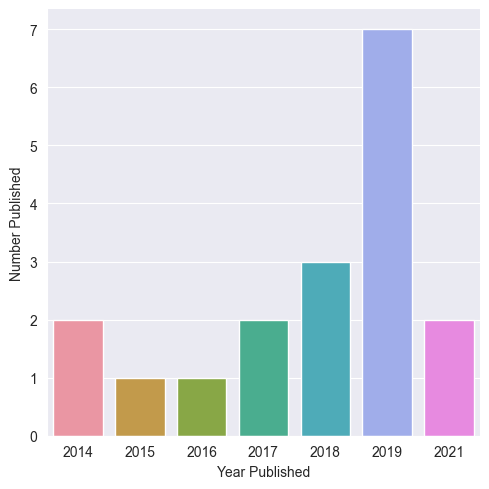

In [138]:
years_plt = sns.catplot(count_years, kind='bar', x='year', y='no_published')
years_plt.set(xlabel='Year Published', ylabel='Number Published')
plt.savefig('plots/years_published.pdf')

## Skills

In [139]:
skill = df.skill.value_counts().reset_index()
skill.columns = ["skill", 'no_papers']
skill.skill = skill.skill.str.title()
skill['proportion'] = (skill.no_papers / skill.no_papers.sum()) * 100
skill

,skill,no_papers,proportion
0,Correctness,10,55.555556
1,Syntactic Correctness,6,33.333333
2,Correctness And Maintainability,1,5.555556
3,Correctness And Readability,1,5.555556


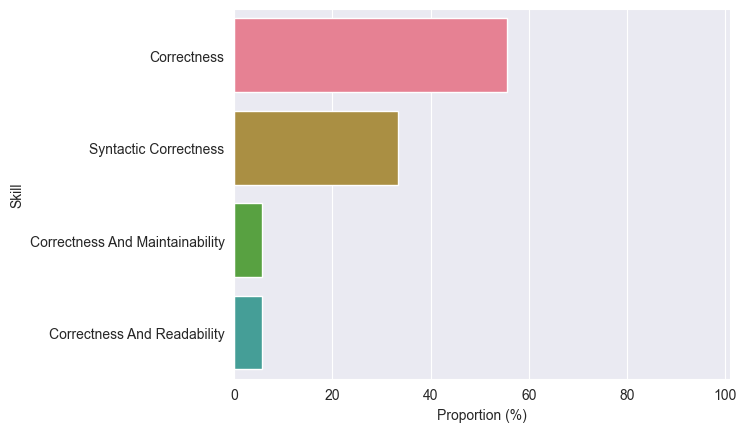

In [140]:
ax_skill = sns.barplot(skill, y='skill', x='proportion')
ax_skill.set(xlabel = 'Proportion (%)', ylabel='Skill')
plt.xlim([0, 101])
plt.savefig('plots/skill.pdf', bbox_inches='tight')

## Paradigm

In [156]:
paradigm = df.copy()
paradigm = paradigm.approach.str.split('; ').explode()
paradigm = paradigm.value_counts().reset_index()
paradigm.columns = ["paradigm", 'no_papers']
paradigm['proportion'] = (paradigm.no_papers / paradigm.no_papers.sum()) * 100
paradigm

,paradigm,no_papers,proportion
0,Supervised,14,73.684211
1,Unsupervised,3,15.789474
2,Semi-Supervised,1,5.263158
3,Reinforcement Learning,1,5.263158


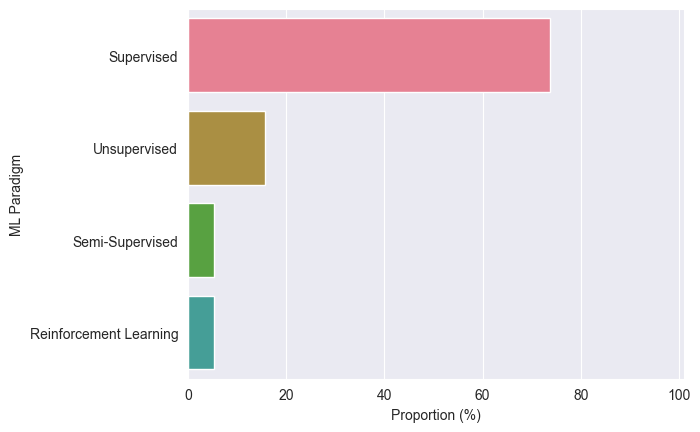

In [157]:
ax_paradigm = sns.barplot(paradigm, y='paradigm', x='proportion')
ax_paradigm.set(xlabel = 'Proportion (%)', ylabel='ML Paradigm')
plt.xlim([0, 101])
plt.savefig('plots/paradigm.pdf', bbox_inches='tight')

## Category

In [143]:
category = df.category.value_counts().reset_index()
category.columns = ["category", 'no_papers']
category['proportion'] = (category.no_papers / category.no_papers.sum()) * 100
category.category = category.category.str.replace('Neural', 'Deep Learning')
category

,category,no_papers,proportion
0,Deep Learning,11,61.111111
1,Traditional,6,33.333333
2,Both,1,5.555556


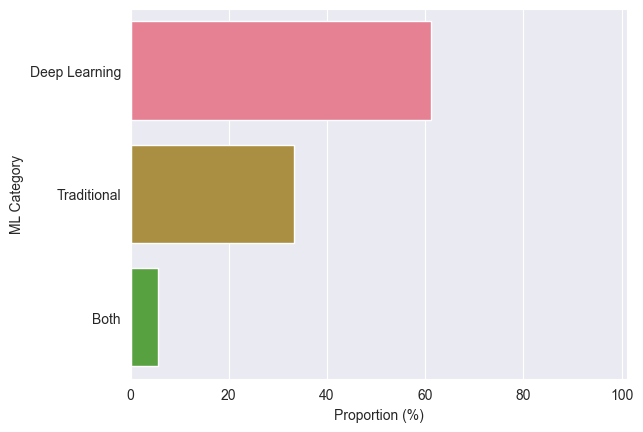

In [144]:
ax_category = sns.barplot(category, y='category', x='proportion')
ax_category.set(xlabel = 'Proportion (%)', ylabel='ML Category')
plt.xlim([0, 101])
plt.savefig('plots/category.pdf', bbox_inches='tight')

## Model
Covered by above two plots and will have specific detail in the discussion section.

## Preprocessing

In [145]:
pre_proc_df = df.copy()
pre_proc_df = pre_proc_df.preprocessing.str.split('; ').explode()
pre_proc_df = pre_proc_df.value_counts().reset_index()
pre_proc_df.columns = ["preprocessing", 'no_papers']
pre_proc_df['proportion'] = (pre_proc_df.no_papers / pre_proc_df.no_papers.sum()) * 100
pre_proc_df.preprocessing = pre_proc_df.preprocessing.apply(lambda x: x.title() if x[0].islower() else x)
pre_proc_df

,preprocessing,no_papers,proportion
0,Normalize tokens,11,36.666667
1,"Convert to Source to Graph (AST, CFG or DDG)",7,23.333333
2,Build good set using unit tests,3,10.000000
3,Remove comments,2,6.666667
4,Encode Line Numbers,1,3.333333
5,Convert blocks to string,1,3.333333
6,Create Rubric With Context-Free-Grammar,1,3.333333
7,Convert to Grammar,1,3.333333
8,Count Tokens,1,3.333333
9,Count Expressions,1,3.333333


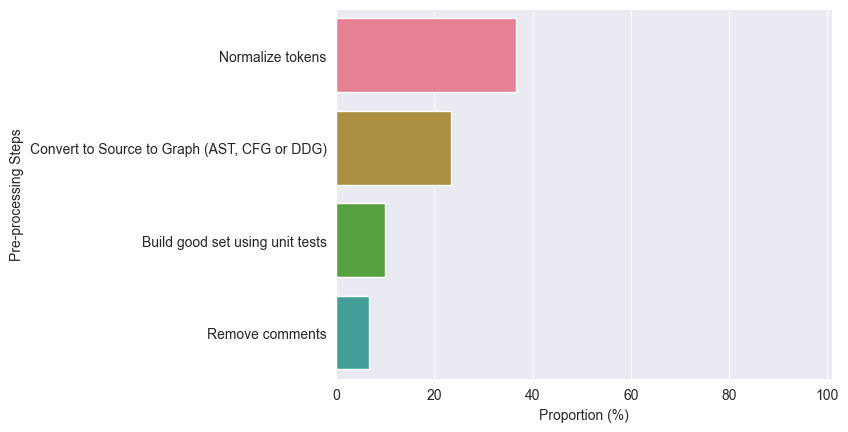

In [146]:
ax_pre_proc = sns.barplot(pre_proc_df[pre_proc_df.no_papers > 1], y='preprocessing', x='proportion')
ax_pre_proc.set(xlabel = 'Proportion (%)', ylabel='Pre-processing Steps')
plt.xlim([0, 101])
plt.savefig('plots/preprocessing.pdf', bbox_inches='tight')

## Evaluation

In [147]:
eval_df = df.copy()
eval_df = eval_df.evaluation.str.split('; ').explode()
eval_df = eval_df.value_counts().reset_index()
eval_df.columns = ["evaluation", 'no_papers']
eval_df['proportion'] = (eval_df.no_papers / eval_df.no_papers.sum()) * 100
eval_df.evaluation = eval_df.evaluation.apply(lambda x: x.title())

eval_df

,evaluation,no_papers,proportion
0,Accuracy,11,21.568627
1,Compared To Baselines,6,11.764706
2,Cross Validation,4,7.843137
3,Compared To Models Within Paper,4,7.843137
4,Case Study,3,5.882353
5,Compared To Human,3,5.882353
6,Precision,2,3.921569
7,Mean Absolute Error,2,3.921569
8,Recall,2,3.921569
9,Pearson Correlation Coefficient,2,3.921569


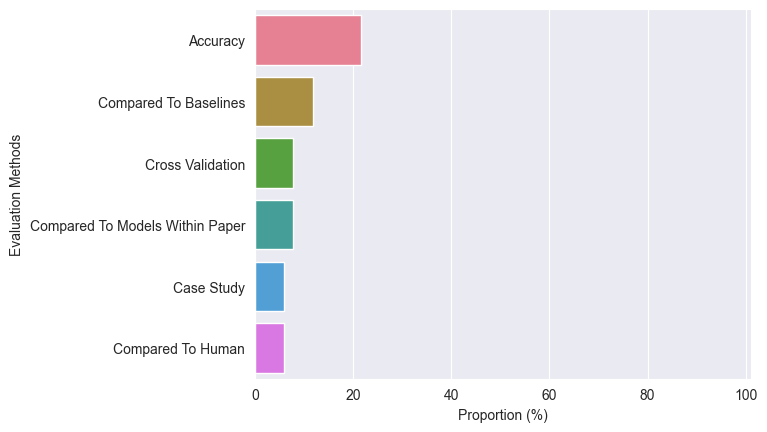

In [148]:
# May need to truncate
ax_eval = sns.barplot(eval_df[eval_df.no_papers > 2], y='evaluation', x='proportion')
ax_eval.set(xlabel = 'Proportion (%)', ylabel='Evaluation Methods')
plt.xlim([0, 101])
plt.savefig('plots/evaluation.pdf', bbox_inches='tight')